Урок 9. Линейная регрессия Логистическая регрессия


Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [40]:
zp =np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

* Математические формулы с intercept:

In [41]:
n=len(ks)
b1=(n*np.sum(zp*ks)-np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-np.sum(zp)**2)
b1

2.6205388824027653

In [43]:
b0 = np.mean(ks)-b1*np.mean(zp)
b0

444.17735732435955

In [44]:
ks_pred = b0+b1*zp
ks_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [13]:
mse=((ks-ks_pred)**2).sum()/n # Квадратичная ошибка
mse

6470.414201176658

In [51]:
remains=(ks-ks_pred) # Проверка на остатки
remains

array([-134.89621821,   11.89839297,  -68.07974498,  -49.2851338 ,
        -89.99891262,  111.38492091,   67.31354303,   64.74181032,
        -12.64202321,   99.56336561])

In [52]:
stats.shapiro(remains) # Проверка на остатки pvalue>alpha, Нулевая гипотеза,нормальное распределение.

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

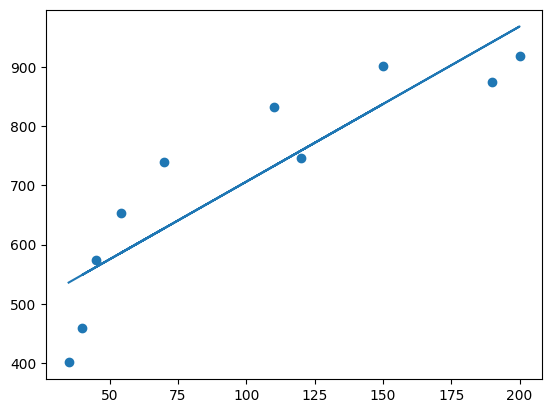

In [53]:
plt.scatter(zp,ks)
plt.plot(zp, ks_pred)

* Матричный метод без inrersept:

In [66]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [67]:
x = len(zp)
print(zp)
y = len(ks)
print(ks)

[ 35  45 190 200  40  70  54 150 120 110]
[401 574 874 919 459 739 653 902 746 832]


In [87]:
X = zp.reshape((10,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [83]:
y = ks.reshape((10,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [81]:
#X=np.hstack([np.ones((10)),x]) # добавление интерсепта


array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,  35.,
        45., 190., 200.,  40.,  70.,  54., 150., 120., 110.])

In [89]:
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)
print('коэффициент', *B)

коэффициент [5.88982042]


In [96]:
ks_pred1=b1*zp
ks_pred1

array([ 206.1437147 ,  265.04191891, 1119.06587983, 1177.96408403,
        235.59281681,  412.28742941,  318.05030269,  883.47306302,
        706.77845042,  647.88024621])

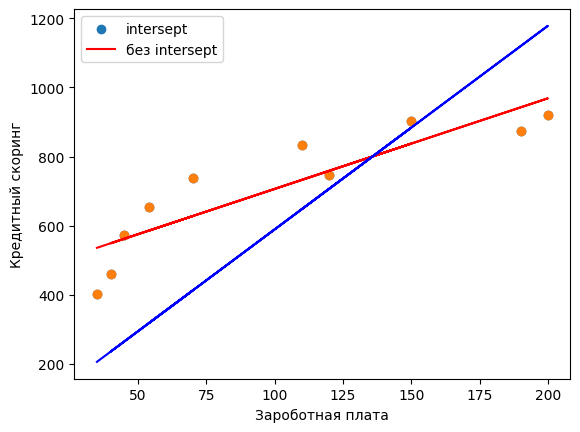

In [105]:
plt.scatter(zp,ks)
plt.plot(zp, ks_pred, color = "red")
plt.scatter(zp,ks)
plt.plot(zp, ks_pred1, color = "blue")
plt.xlabel("Зароботная плата")
plt.ylabel("Кредитный скоринг")
plt.legend(['intersept', 'без intersept'])

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [16]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [10]:
n=10
b1=0.1

In [6]:
#mse = 1/n *np.sum((b1*zp-ks)**2) # производная средней квадратичной ошибки
#mse = 2/n * np.sum((b1*zp-ks)*zp)
mse

518336.326

In [116]:
def mse_(b1, ks=ks,zp=zp,n=10):
    return np.sum((b1*zp-ks)**2)/n
alpha= 1e-5
b1=0.1
for i in range(141):
    b1 -= alpha*(2/n)*np.sum((b1*zp-ks)*zp)
    if i %20==0:
        print(f"Iteration : {i},b1:{b1},mse{mse_(b1)}")

Iteration : 0,b1:1.6952808000000004,mse298904.5992334053
Iteration : 20,b1:5.883166639986514,mse56517.468344241344
Iteration : 40,b1:5.88980986526988,mse56516.858417254174
Iteration : 60,b1:5.889820403389555,mse56516.85841571941
Iteration : 80,b1:5.889820420106129,mse56516.8584157194
Iteration : 100,b1:5.889820420132646,mse56516.85841571941
Iteration : 120,b1:5.889820420132688,mse56516.8584157194
Iteration : 140,b1:5.889820420132688,mse56516.8584157194


3. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [70]:
def mse_(b0,b1, ks=ks,zp=zp,n=10):
    return np.sum((b0+b1*zp-ks)**2)/n
alpha= 3e-5
b1=0.1
b0=0.1
for i in range(2200001):
    b1 -= alpha*(2/n)*np.sum((b0+b1*zp-ks)*zp)
    b0 -= alpha*(2/n)*np.sum((b0+b1*zp-ks))
    if i %200000==0:
        print(f"Iteration : {i},b0:{b0}b1:{b1},mse{mse_(b1,b0)}")

Iteration : 0,b0:0.112866236344b1:4.885234,mse509485.71032951167
Iteration : 200000,b0:423.01987901716745b1:2.776267277130596,mse2397384517.104741
Iteration : 400000,b0:443.16930514092576b1:2.627958592164428,mse2634558786.3897376
Iteration : 600000,b0:444.12932848133295b1:2.620892395922504,mse2646138161.06355
Iteration : 800000,b0:444.1750689807544b1:2.620555725623448,mse2646690496.3418016
Iteration : 1000000,b0:444.17724829578253b1:2.620539684901298,mse2646716813.902573
Iteration : 1200000,b0:444.17735212967165b1:2.6205389206379657,mse2646718067.81115
Iteration : 1400000,b0:444.177357076855b1:2.6205388842245085,mse2646718127.5538445
Iteration : 1600000,b0:444.1773573124796b1:2.6205388824902074,mse2646718130.399272
Iteration : 1800000,b0:444.1773573224922b1:2.6205388824165103,mse2646718130.5201845
Iteration : 2000000,b0:444.1773573224922b1:2.6205388824165103,mse2646718130.5201845
Iteration : 2200000,b0:444.1773573224922b1:2.6205388824165103,mse2646718130.5201845


In [13]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f1/7d/2e562207176a5dcdad513085670674bb11ffaf37e1393eacb6d7fb502481/scikit_learn-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 435.7 kB/s eta 0:00:22
   ---------------------------------------- 0.0/9.2 MB 281.8 kB/s eta 0:00:33
   ---------------------------------------- 0.1/9.2 MB 365.7 kB/s 

In [14]:
from sklearn.linear_model import LinearRegression

In [37]:
model= LinearRegression()

In [17]:
s=zp.reshape(-1,1)
s

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [29]:
regres =model.fit(s,ks) # Интерсепт
print(regres.intercept_) #b0
print(*regres.coef_)     #b1

444.17735732435943
2.6205388824027667
